# Start

In [1]:
# This Pyth|on 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
!pip install "protobuf==3.20.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tens

In [2]:
import os
import shutil

base_path = "/kaggle/input/food41"  # your dataset
images_path = f"{base_path}/images"
meta_path = f"{base_path}/meta/meta"

output_root = "/kaggle/working/food101_split"
train_dir = f"{output_root}/train"
test_dir = f"{output_root}/test"

# Create output folders
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Read split files
with open(f"{meta_path}/train.txt") as f:
    train_files = [line.strip() for line in f]

with open(f"{meta_path}/test.txt") as f:
    test_files = [line.strip() for line in f]

# Move images into train/test folder structure
for fpath in train_files:
    cls = fpath.split("/")[0]
    os.makedirs(f"{train_dir}/{cls}", exist_ok=True)
    shutil.copy(f"{images_path}/{fpath}.jpg", f"{train_dir}/{cls}/")

for fpath in test_files:
    cls = fpath.split("/")[0]
    os.makedirs(f"{test_dir}/{cls}", exist_ok=True)
    shutil.copy(f"{images_path}/{fpath}.jpg", f"{test_dir}/{cls}/")


In [3]:
import tensorflow as tf

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/food101_split/train",
    image_size=(224, 224),
    batch_size=32,         
    label_mode='categorical' 
)

# Load the test data
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/kaggle/working/food101_split/test",
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical' 
)

2025-12-20 16:41:43.449609: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766248903.732864      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766248903.807450      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Found 75750 files belonging to 101 classes.


I0000 00:00:1766248923.837246      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1766248923.837896      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 25250 files belonging to 101 classes.


# Model 1

In [10]:
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),

    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.1),     
    layers.Rescaling(1./255),
    
    layers.Conv2D(32, (3, 3), padding='same'), 
    layers.BatchNormalization(),     
    layers.Activation('relu'),                 
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Dropout(0.5), 
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(101, activation='softmax')
])

In [11]:
# Train
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    train_ds, 
    validation_data=test_ds, 
    epochs=10  # Start with 10 to see how it goes
)

Epoch 1/10


E0000 00:00:1765566661.291890     724 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_2_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 225s 93ms/step - accuracy: 0.0554 - loss: 4.2983 - val_accuracy: 0.0531 - val_loss: 4.5682
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 91ms/step - accuracy: 0.1367 - loss: 3.6879 - val_accuracy: 0.1104 - val_loss: 3.9761
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 92ms/step - accuracy: 0.1950 - loss: 3.3650 - val_accuracy: 0.1029 - val_loss: 4.2592
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 218s 92ms/step - accuracy: 0.2429 - loss: 3.1251 - val_accuracy: 0.1202 - val_loss: 4.1852
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 219s 93ms/step - accuracy: 0.2796 - loss: 2.9304 - val_accuracy: 0.2181 - val_loss: 3.2959
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 220s 93ms/step - accuracy: 0.3152 - loss: 2.7730 - val_accuracy: 0.2627 - val_loss: 3.0670
Epoch 7/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 218s 92ms/step - accuracy: 0.3405 - loss: 2.6578 - val_accuracy: 0.1799 - val_loss: 3.7613
Epoch 8/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 92ms/step - accuracy: 0.3635 - lo

In [12]:
# Save the entire model (architecture + weights)
model.save("food101_custom_cnn_31acc.keras")

In [15]:
# Define the scheduler
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  
    patience=2, 
    min_lr=1e-6,
    verbose=1 
)
# Train with the scheduler
history = model.fit(
    train_ds, 
    validation_data=test_ds, 
    epochs=25,          
    initial_epoch = 10,
    callbacks=[lr_scheduler] 
)

Epoch 11/25
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 219s 92ms/step - accuracy: 0.4136 - loss: 2.3289 - val_accuracy: 0.2823 - val_loss: 3.0944 - learning_rate: 0.0010
Epoch 12/25
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 92ms/step - accuracy: 0.4275 - loss: 2.2638 - val_accuracy: 0.2929 - val_loss: 2.9971 - learning_rate: 0.0010
Epoch 13/25
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 92ms/step - accuracy: 0.4392 - loss: 2.2134 - val_accuracy: 0.3939 - val_loss: 2.4294 - learning_rate: 0.0010
Epoch 14/25
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 92ms/step - accuracy: 0.4510 - loss: 2.1576 - val_accuracy: 0.3503 - val_loss: 2.6588 - learning_rate: 0.0010
Epoch 15/25
2367/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4614 - loss: 2.1168
Epoch 15: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 216s 91ms/step - accuracy: 0.4614 - loss: 2.1168 - val_accuracy: 0.3913 - val_loss: 2.4836 - learning_rate: 0.0010
Epoch 16/25
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 217s 92ms/s

In [16]:
# Save the final, 51% accuracy model
model.save("food101_custom_FINAL_51acc.keras")

# Model 2

In [91]:
#train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, [32, 32]), y))
#test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, [32, 32]), y))

In [31]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models, Input
inputs = Input(shape=(224, 224, 3))

base_model = EfficientNetB0(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [32]:
base_model.trainable = False

In [33]:
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(101, activation='softmax')(x)

In [34]:
model = models.Model(inputs, outputs)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [35]:
history = model.fit( train_ds,validation_data=test_ds,epochs=10, batch_size=64)

Epoch 1/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 149s 53ms/step - accuracy: 0.4024 - loss: 2.4633 - val_accuracy: 0.6677 - val_loss: 1.2180
Epoch 2/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 107s 45ms/step - accuracy: 0.5732 - loss: 1.6475 - val_accuracy: 0.6916 - val_loss: 1.1240
Epoch 3/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 108s 46ms/step - accuracy: 0.6020 - loss: 1.5275 - val_accuracy: 0.7027 - val_loss: 1.0844
Epoch 4/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 109s 46ms/step - accuracy: 0.6209 - loss: 1.4372 - val_accuracy: 0.7082 - val_loss: 1.0699
Epoch 5/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 109s 46ms/step - accuracy: 0.6395 - loss: 1.3567 - val_accuracy: 0.7086 - val_loss: 1.0635
Epoch 6/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 109s 46ms/step - accuracy: 0.6477 - loss: 1.3047 - val_accuracy: 0.7125 - val_loss: 1.0572
Epoch 7/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 109s 46ms/step - accuracy: 0.6604 - loss: 1.2536 - val_accuracy: 0.7121 - val_loss: 1.0631
Epoch 8/10
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 109s 46ms/step - accuracy: 

EfficientNetB4

In [32]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models, Input, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
inputs = Input(shape=(224, 224, 3))

base_model = EfficientNetB4(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)


In [33]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])


In [34]:
base_model.trainable = True
for layer in base_model.layers[:-50]:
    layer.trainable = False

In [35]:
x = data_augmentation(inputs)
x = base_model(x) 

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(101, activation='softmax')(x)

In [36]:
model = models.Model(inputs, outputs)

learning_rate = 0.1
optimizer = optimizers.Adam(learning_rate=learning_rate)

model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)



In [38]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  
    patience=2, 
    min_lr=1e-6,
    verbose=1 
)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1
)
history = model.fit(
    train_ds, 
    validation_data=test_ds, 
    epochs=11,
    callbacks=[lr_scheduler,early_stop] 
)

Epoch 1/11


E0000 00:00:1766262835.848753      47 meta_optimizer.cc:966] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_5_1/efficientnetb4_1/block1b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


2368/2368 ━━━━━━━━━━━━━━━━━━━━ 743s 303ms/step - accuracy: 0.3959 - loss: 2.5722 - val_accuracy: 0.7321 - val_loss: 1.0102 - learning_rate: 0.0010
Epoch 2/11
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 710s 300ms/step - accuracy: 0.6182 - loss: 1.5205 - val_accuracy: 0.7613 - val_loss: 0.9071 - learning_rate: 0.0010
Epoch 3/11
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 711s 300ms/step - accuracy: 0.6725 - loss: 1.2960 - val_accuracy: 0.7754 - val_loss: 0.8808 - learning_rate: 0.0010
Epoch 4/11
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 712s 301ms/step - accuracy: 0.7053 - loss: 1.1491 - val_accuracy: 0.7911 - val_loss: 0.8131 - learning_rate: 0.0010
Epoch 5/11
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 712s 301ms/step - accuracy: 0.7346 - loss: 1.0280 - val_accuracy: 0.7948 - val_loss: 0.8294 - learning_rate: 0.0010
Epoch 6/11
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.7521 - loss: 0.9403
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2368/2368 ━━━━━━━━━━━━━━━━━━━━ 712s 301ms/step - accur

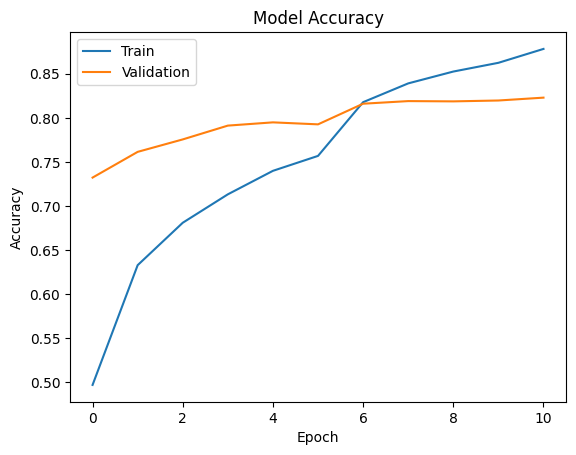

In [41]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()



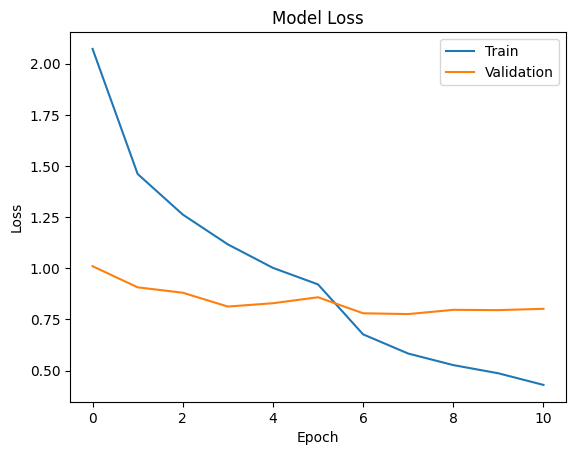

In [42]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [43]:
model.save("food101_custom_FINAL_51acc.keras")